### Statistical Learning for Data Science 2 (229352)
#### Instructor: Donlapark Ponnoprat

#### [Course website](https://donlapark.pages.dev/229352/)

## Lab #5

#### Load data at: https://donlapark.pages.dev/229352/heart_disease.csv

* Decision tree ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html))
* Bagging classifier ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html))
* Random forest ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html))
* Random hyperparameter search using cross-validation ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html))

In [32]:
import pandas as pd
import graphviz

from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

# import data
data = pd.read_csv("heart_disease.csv", na_values="?")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,label
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [33]:
# split into X and y
y = data["label"]
X = data.drop("label", axis=1)

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# impute missing values
imputer = SimpleImputer(strategy="mean")
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Create a decision tree
clf = DecisionTreeClassifier()

![5CV](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [34]:
params = {'max_depth': [3, 6, 9, 12]}

gridcv = GridSearchCV(clf, params, scoring='accuracy', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 6, 9, 12]}, scoring='accuracy')

In [35]:
gridcv.best_estimator_

DecisionTreeClassifier(max_depth=3)

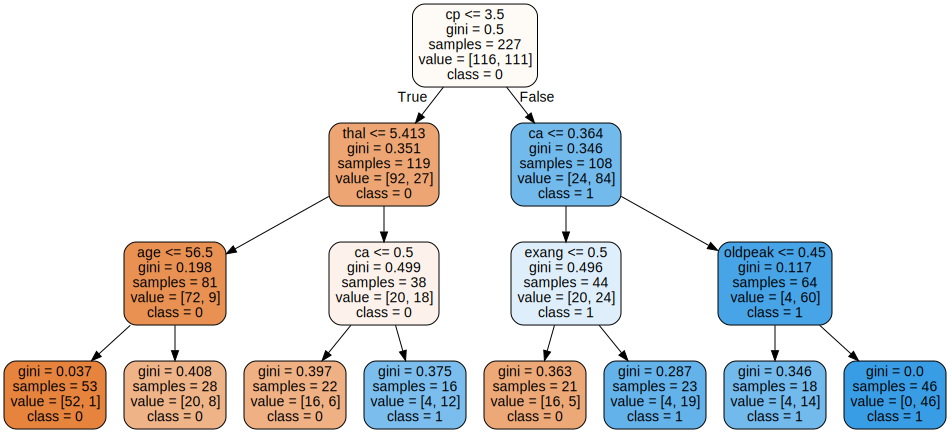

In [36]:
plot_data = export_graphviz(gridcv.best_estimator_,
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

## Bagged decision trees

In [37]:
clf = DecisionTreeClassifier()

bag = BaggingClassifier(clf, n_estimators=200)

bag.fit(X_train, y_train)

trees = bag.estimators_ # List ของโมเดลของต้นไม้ที่เรามีอยู่ทั้งหมด
trees

[DecisionTreeClassifier(random_state=159165807),
 DecisionTreeClassifier(random_state=1326771493),
 DecisionTreeClassifier(random_state=707014433),
 DecisionTreeClassifier(random_state=150552702),
 DecisionTreeClassifier(random_state=1058727261),
 DecisionTreeClassifier(random_state=960561660),
 DecisionTreeClassifier(random_state=900814261),
 DecisionTreeClassifier(random_state=211288415),
 DecisionTreeClassifier(random_state=1039845226),
 DecisionTreeClassifier(random_state=468818690),
 DecisionTreeClassifier(random_state=1483988350),
 DecisionTreeClassifier(random_state=1981081308),
 DecisionTreeClassifier(random_state=58075907),
 DecisionTreeClassifier(random_state=901943728),
 DecisionTreeClassifier(random_state=1073941515),
 DecisionTreeClassifier(random_state=1429613788),
 DecisionTreeClassifier(random_state=1994963102),
 DecisionTreeClassifier(random_state=1191956915),
 DecisionTreeClassifier(random_state=1351922375),
 DecisionTreeClassifier(random_state=2008290474),
 DecisionT

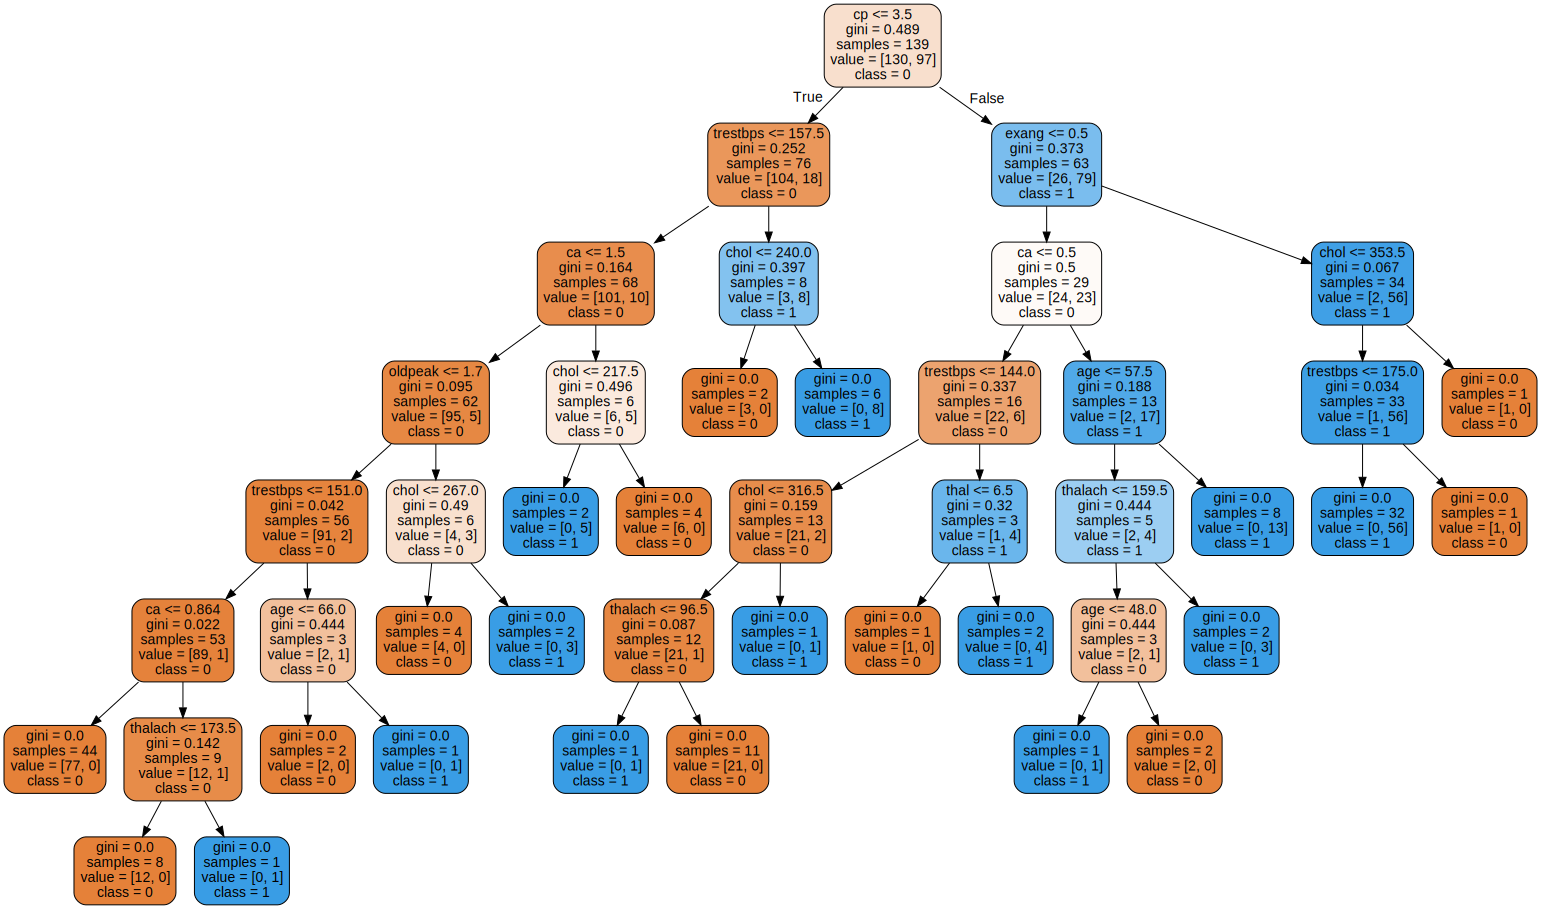

In [38]:
plot_data = export_graphviz(trees[0],
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

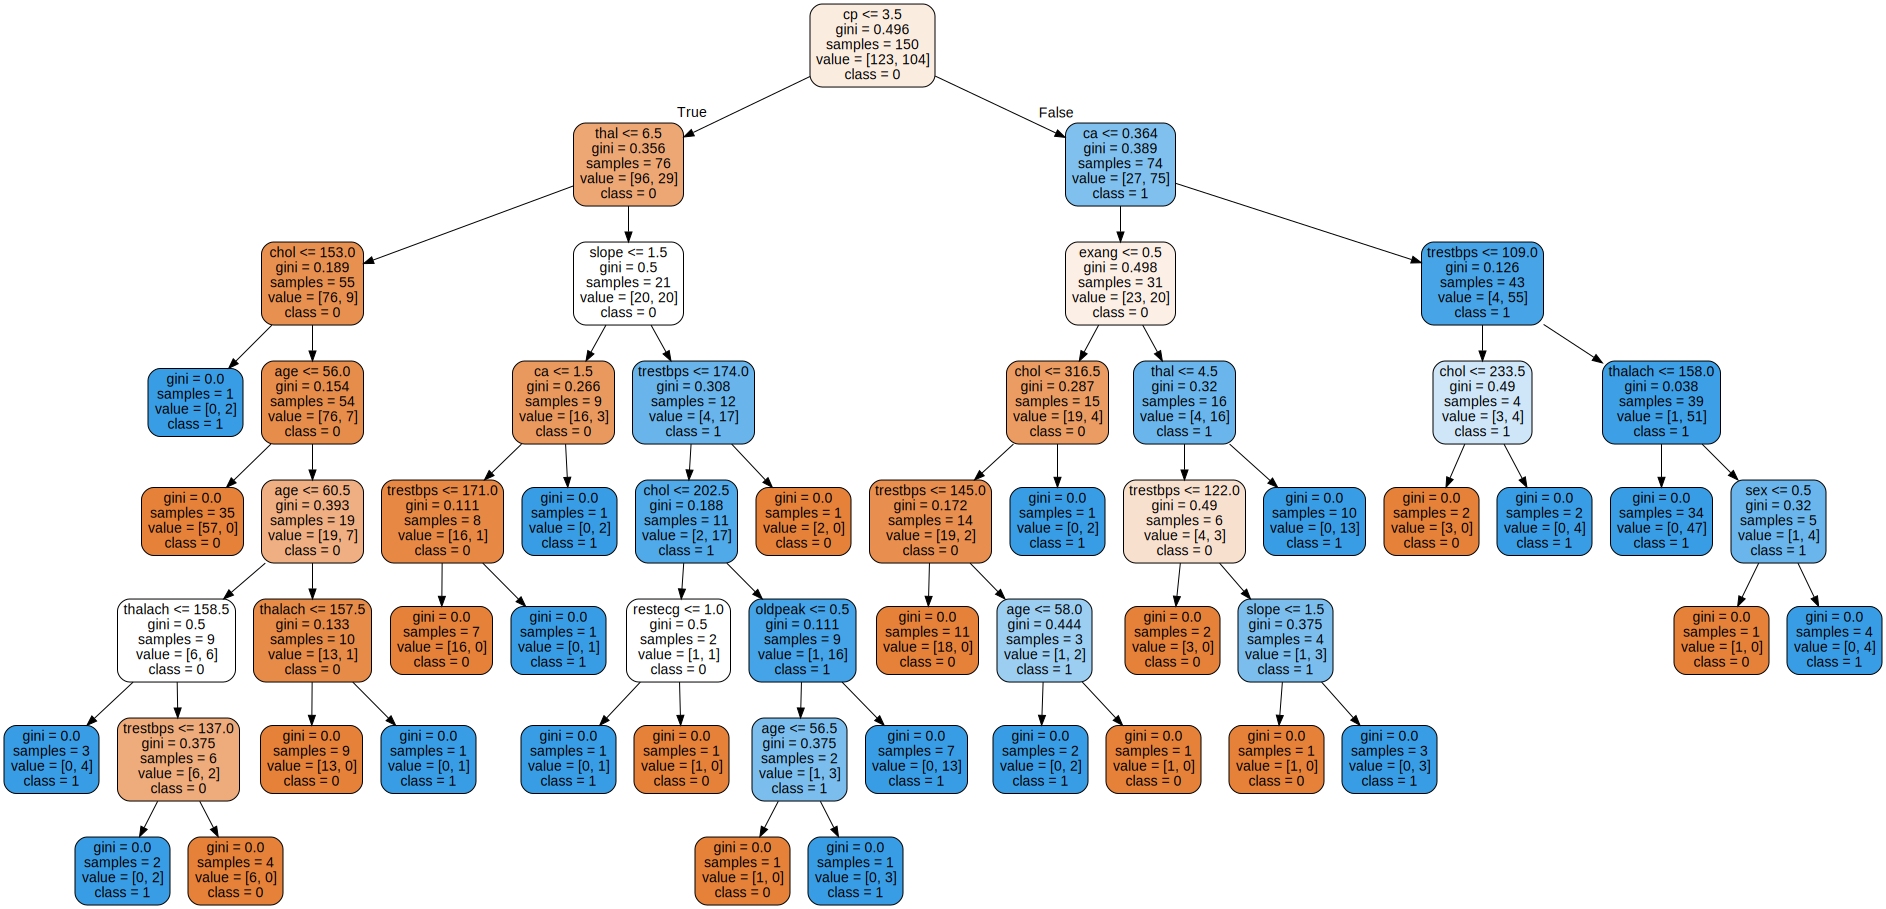

In [39]:
plot_data = export_graphviz(trees[1],
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

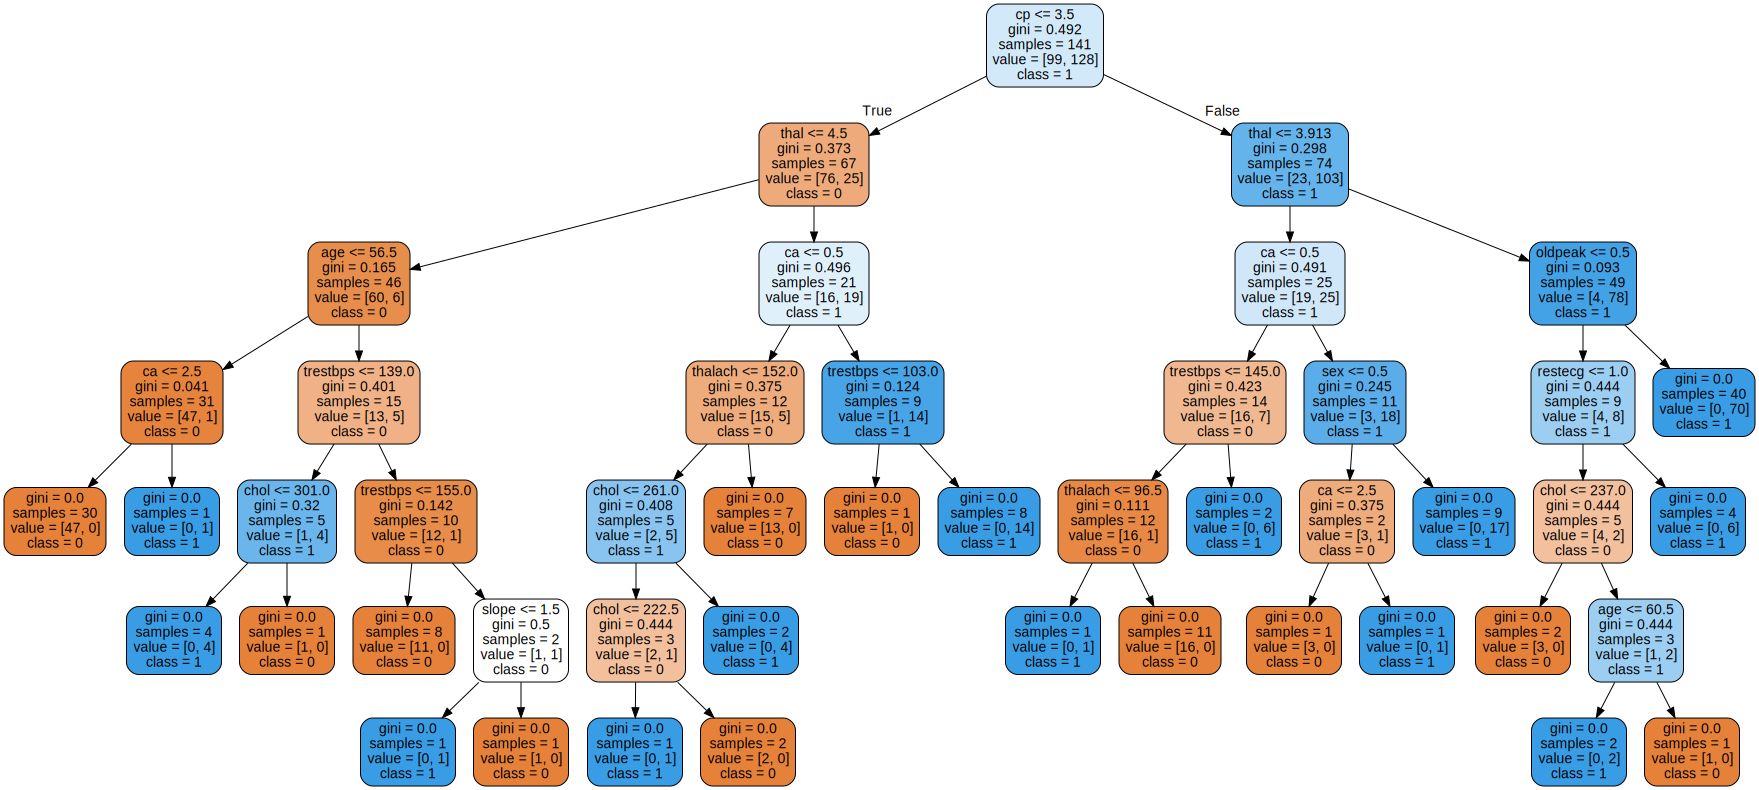

In [40]:
plot_data = export_graphviz(trees[199],
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

In [41]:
# เอาโมเดลที่ได้มาทำนาย
bag.predict(X_test)

array([0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [42]:
y_test # เทียบกันว่าทำนายได้ถูกต้องกันมั้ย

180    1
109    1
184    1
168    1
111    1
      ..
35     0
283    0
98     0
89     0
36     1
Name: label, Length: 76, dtype: int64

## Random forest classifier

In [43]:
rf = RandomForestClassifier(n_estimators=200, max_depth=3) # ต้นไม้แต่ละต้นแตกกิ่งไม่เกิน 3 ครั้ง

rf.fit(X_train, y_train)

rf.estimators_ # List ของต้นไม้ทั้งหมดที่ได้จากการสร้างโมเดล

rf.estimators_[199] # ดูต้นไม้ต้นสุดท้าย (ต้นไม้ต้นที่ 200)

DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=259647017)

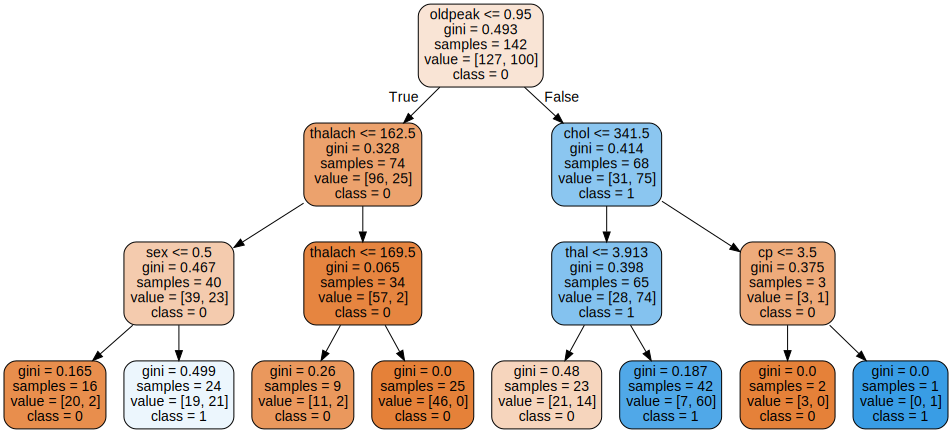

In [44]:
plot_data = export_graphviz(rf.estimators_[20],
                            out_file=None,
                            filled=True,
                            rounded=True,
                            feature_names=data.columns[:-1],
                            class_names=['0', '1'])

graph = graphviz.Source(plot_data)
graph

#### Exercise
1. Study the hyperparameters of three models: [Decision tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html), [Bagged Decision Trees](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html) and [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
2. For each model, use pipeline+grid search cross-validation across multiple hyperparameters to find the best model.
* Decision tree: choose at least 3 hyperparameters
* Bagged decision trees: choose at least 3 hyperparameters
* Random forest: choose at least 3 hyperparameters
3. For each model, compute the `f1_macro` and `accuracy` score on the test set.
* What is your best model?
* Plot the best tree model
* What hyperparameters did you choose? (explain in words, not in `sklearn's` parameter name)
* What are the best values of your hyperparameters?

#### Model: Decision tree

In [45]:
# Decision tree กับ Random Forest ใช้ Parameters เหมือนกันได้เลย
# Bagged Decision Trees (n_estimators, max_samples, max_features, bootstrap)
# bootstrap สุ่มจุดเดียวกันสองครั้งได้หรือเปล่า ถ้า True จะได้ข้อมูลที่มีหน้าตาเดียวกัน

In [46]:
# Create Pipeline for Decision tree
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

#ใส่ tuple ของ Model เราเข้าไป Pipeline([(ชื่อโมเดลของเรา,ฟังก์ชันที่โมเดลเราใช้)])
pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                     ('clf', DecisionTreeClassifier())])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.66      0.75      0.70        28

    accuracy                           0.76        76
   macro avg       0.75      0.76      0.75        76
weighted avg       0.77      0.76      0.77        76



In [48]:
# Grid Search
# parameters = {'ชื่อโมเดล__ชื่อพารามิเตอร์ที่เรากำหนดไว้': [พารามิเตอร์]}
parameters = {'imputer__strategy': ['mean'],
              'clf__splitter': ['best', 'random'],
              'clf__max_depth': [None, 3, 6, 9, 12],
              'clf__min_samples_split': [2, 5, 10]}

gridcv = GridSearchCV(pipeline, parameters, scoring='f1_macro', cv=5)
gridcv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('clf', DecisionTreeClassifier())]),
             param_grid={'clf__max_depth': [None, 3, 6, 9, 12],
                         'clf__min_samples_split': [2, 5, 10],
                         'clf__splitter': ['best', 'random'],
                         'imputer__strategy': ['mean']},
             scoring='f1_macro')

In [49]:
# Calculate F1-Score Macro avg
y_pred = gridcv.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        48
           1       0.68      0.68      0.68        28

    accuracy                           0.76        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.76      0.76      0.76        76



#### Model: Bagged Decision Trees

In [50]:
# Create Pipeline for Bagged Decision Trees
#ใส่ tuple ของ Model เราเข้าไป Pipeline([(ชื่อโมเดลของเรา,ฟังก์ชันที่โมเดลเราใช้)])
pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                     ('bag', BaggingClassifier(clf, n_estimators=200))])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        48
           1       0.71      0.71      0.71        28

    accuracy                           0.79        76
   macro avg       0.77      0.77      0.77        76
weighted avg       0.79      0.79      0.79        76



In [51]:
# Grid Search
# parameters = {'ชื่อโมเดล__ชื่อพารามิเตอร์ที่เรากำหนดไว้': [พารามิเตอร์]}
parameters = {'imputer__strategy': ['mean'],
              'bag__n_estimators': [50, 100, 200],
              'bag__max_samples': [0.5, 0.7, 1.0],
              'bag__max_features': [0.5, 0.7, 1.0]}

gridcv2 = GridSearchCV(pipeline, parameters, scoring='f1_macro', cv=5)
gridcv2.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('bag',
                                        BaggingClassifier(estimator=DecisionTreeClassifier(),
                                                          n_estimators=200))]),
             param_grid={'bag__max_features': [0.5, 0.7, 1.0],
                         'bag__max_samples': [0.5, 0.7, 1.0],
                         'bag__n_estimators': [50, 100, 200],
                         'imputer__strategy': ['mean']},
             scoring='f1_macro')

In [52]:
# Calculate F1-Score Macro avg
y_pred2 = gridcv2.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        48
           1       0.77      0.71      0.74        28

    accuracy                           0.82        76
   macro avg       0.80      0.79      0.80        76
weighted avg       0.81      0.82      0.81        76



#### Random Forest

In [53]:
# Create Pipeline for Random Forest
#ใส่ tuple ของ Model เราเข้าไป Pipeline([(ชื่อโมเดลของเรา,ฟังก์ชันที่โมเดลเราใช้)])
pipeline = Pipeline([('imputer', SimpleImputer(strategy='mean')),
                     ('rf', RandomForestClassifier(n_estimators=200, max_depth=3))])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88        48
           1       0.79      0.79      0.79        28

    accuracy                           0.84        76
   macro avg       0.83      0.83      0.83        76
weighted avg       0.84      0.84      0.84        76



In [55]:
# Grid Search
# parameters = {'ชื่อโมเดล__ชื่อพารามิเตอร์ที่เรากำหนดไว้': [พารามิเตอร์]}
parameters = {'imputer__strategy': ['mean'],
              'rf__max_depth': [None, 3, 6, 9, 12],
              'rf__min_samples_split': [2, 5, 10]}

gridcv3 = GridSearchCV(pipeline, parameters, scoring='f1_macro', cv=5)
gridcv3.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('imputer', SimpleImputer()),
                                       ('rf',
                                        RandomForestClassifier(max_depth=3,
                                                               n_estimators=200))]),
             param_grid={'imputer__strategy': ['mean'],
                         'rf__max_depth': [None, 3, 6, 9, 12],
                         'rf__min_samples_split': [2, 5, 10]},
             scoring='f1_macro')

In [56]:
# Calculate F1-Score Macro avg
y_pred3 = gridcv3.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        48
           1       0.81      0.75      0.78        28

    accuracy                           0.84        76
   macro avg       0.83      0.82      0.83        76
weighted avg       0.84      0.84      0.84        76



#### What is your best model?

In [58]:
# Get the best estimator from the grid search
best_estimator = gridcv3.best_estimator_
best_estimator

Pipeline(steps=[('imputer', SimpleImputer()),
                ('rf',
                 RandomForestClassifier(max_depth=3, min_samples_split=5,
                                        n_estimators=200))])

According to the Random Forest Model which has the highest F1-Score macro avg of 0.83 and an accuracy of 0.84

In conclusion Random Forest is my best model

#### Plot the best tree model

AttributeError: 'Pipeline' object has no attribute 'estimators_'

#### What hyperparameters did you choose? (explain in words, not in sklearn's parameter name)

I chose the maximum depth of Random Forest to expand until all leaves are pure or expand until reach the maximum depth of 3, 6, 9, 12

And I chose the minimum number of samples that are required to split an internal node to 2, 5, or 10

#### What are the best values of your hyperparameters?

The best values of my hyperparameters is max_depth=3, min_samples_split=5